In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import h5py
import os

from synsets import load_syn_data, det_clsloc_names
from val_data import load_val_database, ValImage, ObjectAnnotation
from data_loader import ValDataLoader
from val_utils import get_db_image

from model_data import *

import cv2

from bounding_boxes import *

Using TensorFlow backend.


In [3]:
results = "../results/"
bb_folder = "../bounding_boxes/"
db_bb_file = os.path.join(bb_folder, "bb_center_010.h5")
results_file = os.path.join(results, "preds_resnet50_original.h5")
# Load databases
syn_data = load_syn_data()
db = load_val_database(syn_data)
models = load_model_results(syn_data, db)

Loaded DET data
Loaded CLSLOC data
Computed relation between CLSLOC and DET.
Loading Keras imagenet class index
Loading validation data...
Data loaded! 20121 images
Finding val images with only one object..
One object database built: 7706 images
Loading ground truth labels...
Loaded!
Computing image distribution in each of the 200 categories...
Done!
Processing model resnet50
DONE! Processing model resnet50
Processing model inceptionv3
DONE! Processing model inceptionv3
Processing model vgg16
DONE! Processing model vgg16
Processing model vgg19
DONE! Processing model vgg19
All models processed!!


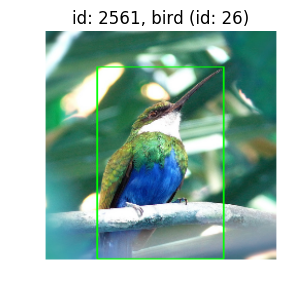

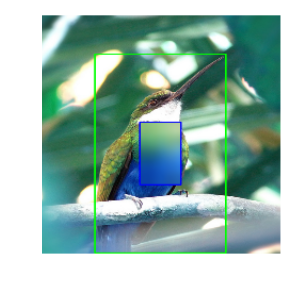

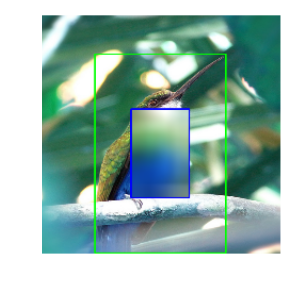

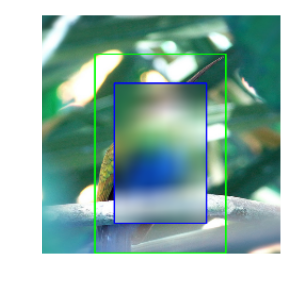

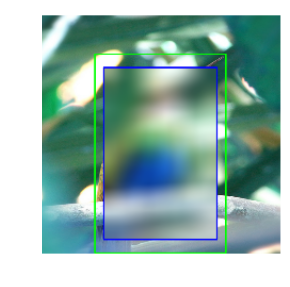

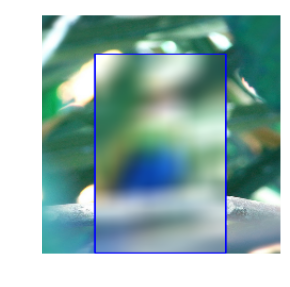

In [20]:
# Center occlusion
idx = 2561
for ds in ['original', "bb_center_010", "bb_center_020", "bb_center_050", "bb_center_075", "bb_center_100"]:
    plt.figure(figsize=(3,3))
    plt.imshow(get_dataset_img(db, models['resnet50'].datasets[ds], idx, show_bb=True, load_size='model'))
    plt.axis('equal')
    plt.axis('off')
    det_class, _ = det_clsloc_names(syn_data, db.labels[idx],1)
    if ds=='original': plt.title("id: {}, {}".format(idx, det_class))
    plt.xlim([0,224])
    plt.ylim([224,0])
    plt.tight_layout()

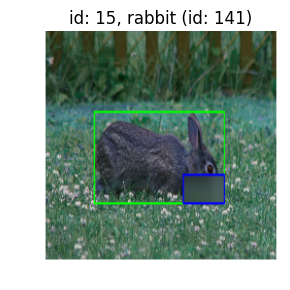

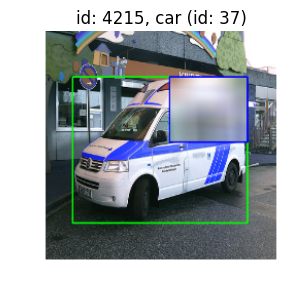

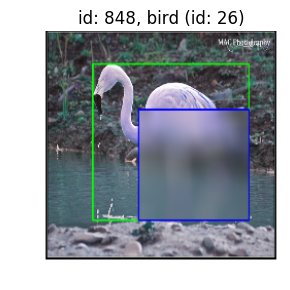

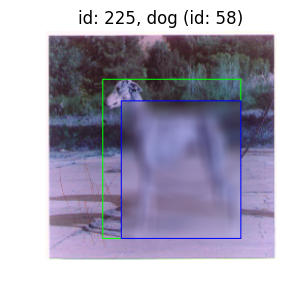

In [32]:
# Center occlusion
for ds,idx in zip(["bb_corner_010", "bb_corner_020", "bb_corner_050", "bb_corner_075"],
                  [15, 4215, 848, 225]):
#     print(idx)
    plt.figure(figsize=(3,3))
    plt.imshow(get_dataset_img(db, models['resnet50'].datasets[ds], idx, show_bb=True, load_size='model'))
    plt.axis('equal')
    plt.axis('off')
    det_class, _ = det_clsloc_names(syn_data, db.labels[idx],1)
    plt.title("id: {}, {}".format(idx, det_class))
    plt.xlim([0,224])
    plt.ylim([224,0])
    plt.tight_layout()

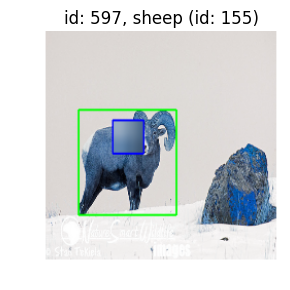

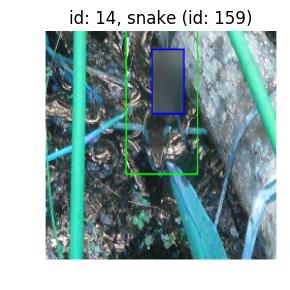

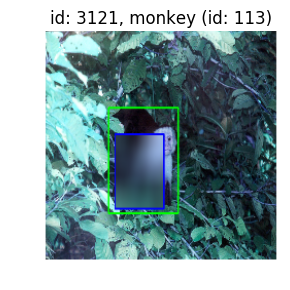

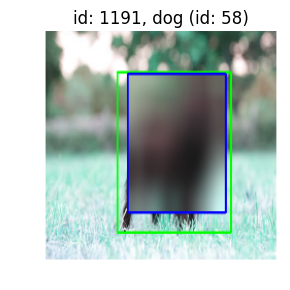

In [33]:
# Center occlusion
for ds,idx in zip(["bb_random_010", "bb_random_020", "bb_random_050", "bb_random_075"],
                  [597, 14, 3121, 1191]):
#     print(idx)
    plt.figure(figsize=(3,3))
    plt.imshow(get_dataset_img(db, models['resnet50'].datasets[ds], idx, show_bb=True, load_size='model'))
    plt.axis('equal')
    plt.axis('off')
    det_class, _ = det_clsloc_names(syn_data, db.labels[idx],1)
    plt.title("id: {}, {}".format(idx, det_class))
    plt.xlim([0,224])
    plt.ylim([224,0])
    plt.tight_layout()